<a href="https://colab.research.google.com/github/carlibeisel/mason_water_budget/blob/main/irrigation_type_FWT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Irrigation Type from Freshwater Trust Data

In [1]:
# ------------------ #
#  Import Libraries  #
# ------------------ #
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Figures

<ipython-input-24-d36317fa2cf7>:6: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  irrigation_type['irr_acres'] = irrigation_type.geometry.area * 0.000247105  # convert the geometry to acres


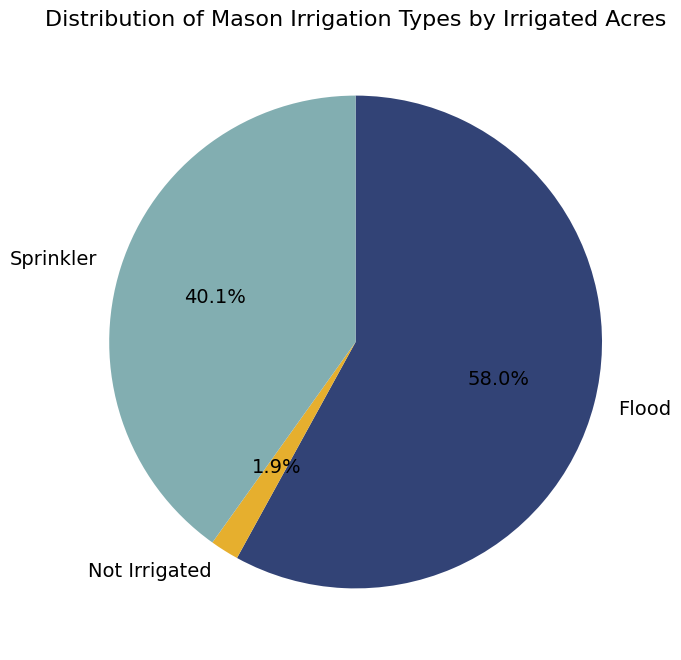

In [24]:
# ------------------------------------- #
#   Irrigation Type for All of Mason
# ------------------------------------- #

irrigation_type = gpd.read_file('/content/drive/MyDrive/Data/Mason Water Budget/data_input/irrigation_runoff/irrigation_runoff.shp')
irrigation_type['irr_acres'] = irrigation_type.geometry.area * 0.000247105  # convert the geometry to acres

# Group by 'irr_type' and sum the area in acres
irrigation_type_acres = irrigation_type.groupby('irr_type_y')['irr_acres'].sum()

# Define a custom color palette for each irrigation type
custom_palette = {
    'Not Irrigated': '#E6AF2E',
    'Drip': '#BA3F1D',
    'Sprinkler': '#82AEB1',
    'Flood': '#324376'
}

colors = [custom_palette.get(irrig_type) for irrig_type in irrigation_type_acres.index]

# Plot the pie chart
plt.figure(figsize=(8, 8))
irrigation_type_acres.plot.pie(autopct='%1.1f%%', startangle=90, counterclock=False, colors=colors,
                               textprops={'fontsize': 14})  # Increase font size for percentages
plt.gca().set_aspect('equal')

plt.title('Distribution of Mason Irrigation Types by Irrigated Acres', fontsize=16)  # Increase title font size
plt.ylabel('')  # Remove the y-axis label

plt.show()


<ipython-input-26-2e33c57007e9>:18: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  irrigation_type['irr_acres'] = irrigation_type.geometry.area * 0.000247105  # 1 square meter = 0.000247105 acres


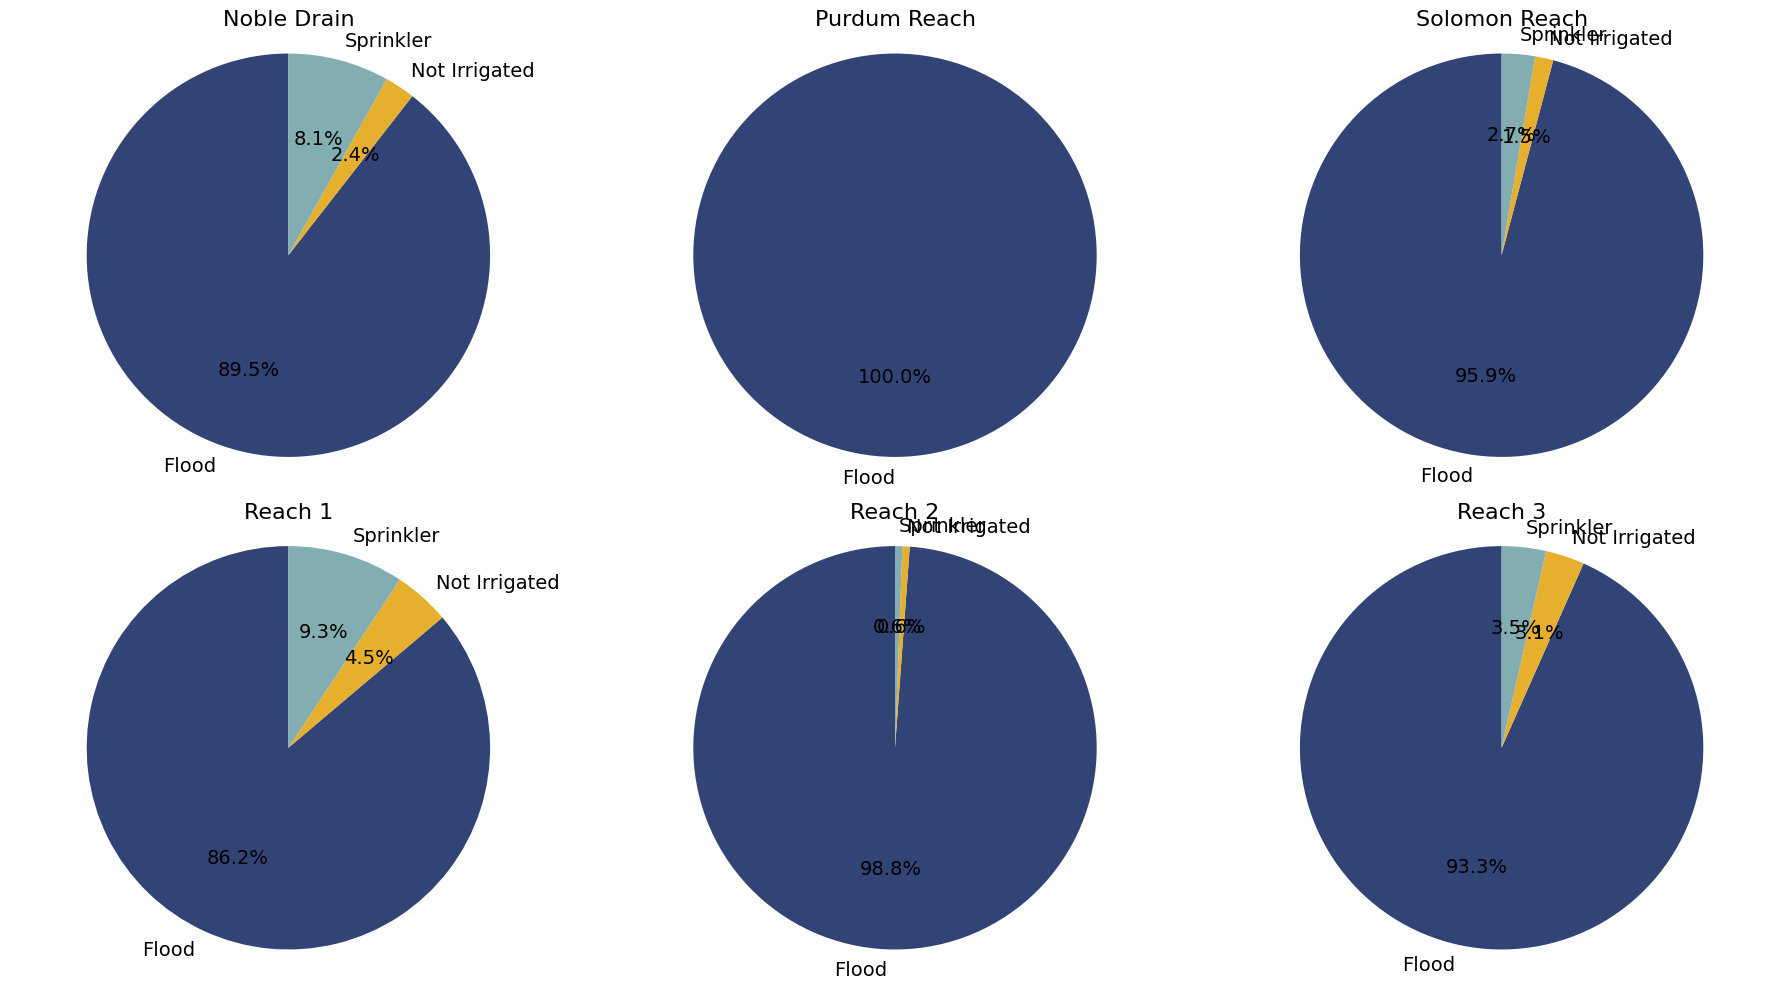

In [26]:
# ------------------------------------- #
#     Irrigation Type for each Reach
# ------------------------------------- #

reaches = gpd.read_file('/content/drive/MyDrive/Data/Mason Water Budget/data_input/reach_shapefile/Reaches_Final_1209/Reach_Final.shp')

name_column = 'Reach'

# Define a custom color palette for each irrigation type
custom_palette = {
    'Not Irrigated': '#E6AF2E',  # mustard yellow
    'Drip': '#BA3F1D',           # rust
    'Sprinkler': '#82AEB1',      # light blue
    'Flood': '#324376'           # dark blue
}

# Convert geometry to acres (make sure CRS is projected correctly)
irrigation_type['irr_acres'] = irrigation_type.geometry.area * 0.000247105  # 1 square meter = 0.000247105 acres

# Create a list to store data for each reach
reach_data = []

# Determine the number of unique reaches
unique_reaches = reaches[name_column].unique()
num_reaches = len(unique_reaches)

# Define 2x3 grid (2 columns, 3 rows)
cols = 3  # Set to 3 columns
rows = 2  # Set to 2 rows

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(18, 10))  # Adjusted figure size for the new layout
axes = axes.flatten()  # Flatten the axes array to easily iterate over it

for i, reach_name in enumerate(unique_reaches):
    selected_reach = reaches[reaches[name_column] == reach_name]
    joined_data = gpd.sjoin(irrigation_type, selected_reach, how='inner', predicate='intersects')
    irrigation_in_reach = joined_data.groupby('irr_type_y')['irr_acres'].sum().reset_index()
    irrigation_in_reach['reach_name'] = reach_name  # Add a column for reach_name

    reach_data.append(irrigation_in_reach)
    irrigation_types = irrigation_in_reach['irr_type_y']
    colors = [custom_palette.get(irrig_type) for irrig_type in irrigation_types]
    ax = axes[i]
    ax.pie(irrigation_in_reach['irr_acres'], labels=irrigation_types, colors=colors, autopct='%1.1f%%', startangle=90,
           textprops={'fontsize': 14})  # Increased font size for the percentages
    ax.set_title(f'{reach_name}', fontsize=16)  # Larger title font size
    ax.axis('equal')  # Equal aspect ratio to ensure the pie is drawn as a circle
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()

plt.show()
reach_data_df = pd.concat(reach_data, ignore_index=True)


## Stacked Bar Plot

In [ ]:
# ------------------ #
#  Import Libraries  #
# ------------------ #
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# FWT shapefile of irrigation type based on ML, satellite imagery, & OpenET
irrigation_type = gpd.read_file('/content/drive/MyDrive/Data/Mason/data_input/fwt_irrigation_runoff/mason_creek_fields/mason_creek_fields.shp')
reaches = gpd.read_file('/content/drive/MyDrive/Data/Mason/data_input/reach_shapefile/Reach_Final/Reach_Final.shp')

In [ ]:
reaches

,Id,Name,Shape_Leng,Shape_Area,Field,geometry
0,0,Noble Drain,0.232591,0.001078,0,"POLYGON ((530652.031 4833671.656, 530591.555 4..."
1,0,Reach 1,0.158197,0.000791,0,"POLYGON ((536008.647 4826369.278, 535998.384 4..."
2,0,Purdum Reach,0.144468,0.000490,0,"POLYGON ((534987.015 4831443.51, 534986.636 48..."
3,0,Solomon Reach,0.109005,0.000388,0,"POLYGON ((528570.92 4835677.182, 528698.241 48..."
4,0,Reach 2,0.000000,0.000000,0,"POLYGON ((534232.916 4831354.137, 534476.544 4..."
5,0,Reach 3,0.237402,0.001411,0,"MULTIPOLYGON (((536295.539 4831408.732, 536336..."
6,0,Reach 4,0.000000,0.000000,0,"POLYGON ((529121.372 4835431.292, 528832.241 4..."


In [ ]:
irrigation_type

,_uid_,field_id,tft_id,irr_type,aoi,geometry,irr_acres
0,1.0,23180,43.49507-116.37677,Flood,Mason Creek,"POLYGON ((550414.462 4816022.996, 550413.576 4...",1.097026
1,2.0,24456,43.53281-116.34780,Flood,Mason Creek,"POLYGON ((552732.446 4820107.713, 552670.855 4...",2.506749
2,3.0,24273,43.50353-116.35131,Flood,Mason Creek,"POLYGON ((552499.12 4816859.221, 552373.153 48...",4.499577
3,4.0,24275,43.53986-116.35923,Flood,Mason Creek,"POLYGON ((551749.673 4821130.903, 551779.176 4...",8.364023
4,5.0,24282,43.55105-116.37211,Sprinkler,Mason Creek,"POLYGON ((550531.986 4822229.857, 550524.686 4...",11.564430
...,...,...,...,...,...,...,...
1282,1283.0,7928,43.50903-116.34529,Flood,Mason Creek,"POLYGON ((552808.198 4817435.809, 552810.08 48...",6.730326
1283,1284.0,7929,43.50320-116.34827,Sprinkler,Mason Creek,"POLYGON ((552605.703 4816929.877, 552650.147 4...",3.555706
1284,1285.0,8001,43.67177-116.62654,Flood,Mason Creek,"POLYGON ((530218.909 4835327.212, 530164.149 4...",13.550259
1285,1286.0,8320,43.52284-116.36111,Flood,Mason Creek,"POLYGON ((551744.797 4819253.548, 551746.737 4...",21.194444


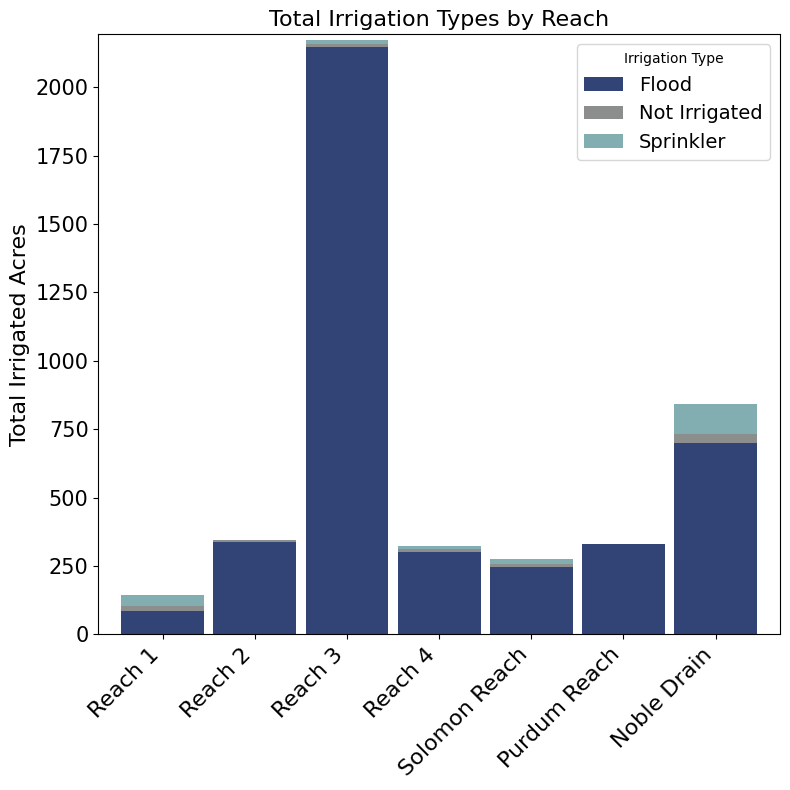

In [ ]:
## ----------------------##
#     Stacked Bar Plot    #
## ----------------------##

# acres

# stacked bar plot of irrigation type by reach

custom_palette = {
    'Not Irrigated': '#8C8D8D',  # gray
    'Drip': '#BA3F1D',           # rust
    'Sprinkler': '#82AEB1',      # light blue
    'Flood': '#324376'           # navy blue
}


irrigation_type = irrigation_type.to_crs(epsg=32611)
reaches = reaches.to_crs(epsg=32611)  # reproject reaches to the same CRS


irrigation_type['irr_acres'] = irrigation_type.geometry.area * 0.000247105  # calculate the area of irrigation type in acres
reach_data = []

for reach_name in reaches['Name'].unique():
    selected_reach = reaches[reaches['Name'] == reach_name]
    joined_data = gpd.sjoin(irrigation_type, selected_reach, how='inner', predicate='intersects')

    # group by irrigation type to sum the area in acres for each reach
    irrigation_in_reach = joined_data.groupby('irr_type')['irr_acres'].sum().reset_index()
    irrigation_in_reach['reach_name'] = reach_name

    reach_data.append(irrigation_in_reach)

# Combine all the reach data into one DataFrame
reach_data_df = pd.concat(reach_data, ignore_index=True)

reach_pivot = reach_data_df.pivot(index='reach_name', columns='irr_type', values='irr_acres').fillna(0)
custom_order = ['Reach 1', 'Reach 2', 'Reach 3', 'Reach 4', 'Solomon Reach', 'Purdum Reach', 'Noble Drain']
reach_pivot = reach_pivot.reindex(custom_order)
colors = [custom_palette.get(irrig_type, '#D3D3D3') for irrig_type in reach_pivot.columns]
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the data
reach_pivot.plot(
    kind='bar', stacked=True, ax=ax, width=0.9, color=colors
)

# Set labels and title
ax.set_xlabel('', fontsize=16)
ax.set_ylabel('Total Irrigated Acres', fontsize=16)  # Updated label to reflect total acres
ax.set_title('Total Irrigation Types by Reach', fontsize=16)

# Customize ticks and labels
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=15)

# Adjust y-axis limits
max_area = reach_pivot.sum(axis=1).max()
ax.set_ylim(0, max_area * 1.01)
plt.legend(reach_pivot.columns, loc="upper right", fontsize=14, title="Irrigation Type")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Carli Thesis/Figures/Water Budget/reach_irrigation_type.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
## ---------------------------- ##
#    Sprinkler Irrigation %
## ---------------------------- ##

# Pivot the data for each irrigation type and fill missing values with 0
reach_pivot = reach_data_df.pivot(index='reach_name', columns='irr_type', values='irr_acres').fillna(0)

# Calculate total irrigated acres for each reach
reach_pivot['Total Irrigated Acres'] = reach_pivot.sum(axis=1)

# Calculate the percentage of sprinkler irrigation for each reach
reach_pivot['Sprinkler Irrigation Percentage'] = (reach_pivot['Sprinkler'] / reach_pivot['Total Irrigated Acres']) * 100

# Display the percentage of sprinkler irrigation for each reach
sprinkler_irrigation_percentage = reach_pivot[['Sprinkler Irrigation Percentage']]
print(sprinkler_irrigation_percentage)

irr_type       Sprinkler Irrigation Percentage
reach_name                                    
Noble Drain                          13.090515
Purdum Reach                          0.000000
Reach 1                              28.279074
Reach 2                               0.000000
Reach 3                               0.568296
Reach 4                               3.541792
Solomon Reach                         7.247294


In [ ]:
## ---------------------------- ##
#    Total Irrigated Fields
## ---------------------------- ##

# Combine all the reach data into one DataFrame
reach_data_df = pd.concat(reach_data, ignore_index=True)

# Pivot the data for each irrigation type and fill missing values with 0
reach_pivot = reach_data_df.pivot(index='reach_name', columns='irr_type', values='irr_acres').fillna(0)

# Calculate total irrigated acres for each reach
reach_pivot['Total Irrigated Acres'] = reach_pivot.sum(axis=1)

# Display the total irrigated acres for each reach
total_irrigated_acres = reach_pivot[['Total Irrigated Acres']]
print(total_irrigated_acres)

irr_type       Total Irrigated Acres
reach_name                          
Noble Drain               841.812271
Purdum Reach              332.245626
Reach 1                   144.694913
Reach 2                   344.824570
Reach 3                  2171.621452
Reach 4                   321.947643
Solomon Reach             275.947994


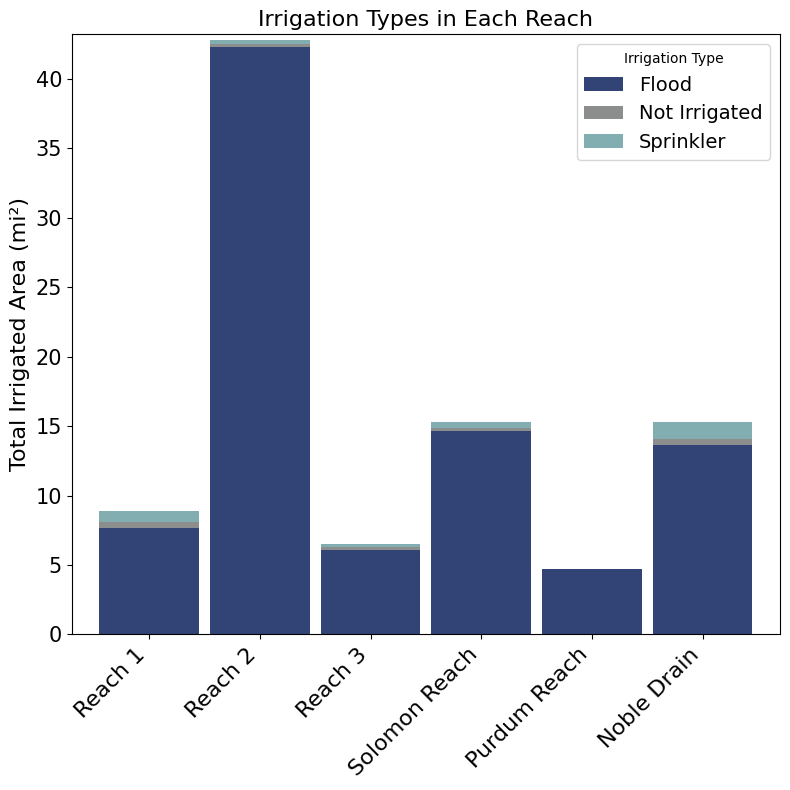

In [19]:
## ----------------------##
#     Stacked Bar Plot    #
## ----------------------##

# sq miles

# stacked bar plot of irrigation type by reach


custom_palette = {
    'Not Irrigated': '#8C8D8D',  # gray
    'Drip': '#BA3F1D',           # rust
    'Sprinkler': '#82AEB1',      # light blue
    'Flood': '#324376'           # navy blue
}

# Reproject both GeoDataFrames to the same CRS (UTM zone 11N, EPSG:32611)
irrigation_type = irrigation_type.to_crs(epsg=32611)
reaches = reaches.to_crs(epsg=32611)  # reproject reaches to the same CRS

# calculate the area of irrigation type in acres, then convert to square miles
irrigation_type['irr_acres'] = irrigation_type.geometry.area * 0.000247105  # Convert to acres
irrigation_type['irr_sq_miles'] = irrigation_type['irr_acres'] / 640  # Convert acres to square miles

reach_data = []

for reach_name in reaches['Reach'].unique():
    selected_reach = reaches[reaches['Reach'] == reach_name]
    joined_data = gpd.sjoin(irrigation_type, selected_reach, how='inner', predicate='intersects')

    irrigation_in_reach = joined_data.groupby('irr_type_y')['irr_sq_miles'].sum().reset_index()
    irrigation_in_reach['reach_name'] = reach_name

    reach_data.append(irrigation_in_reach)

reach_data_df = pd.concat(reach_data, ignore_index=True)

reach_pivot = reach_data_df.pivot(index='reach_name', columns='irr_type_y', values='irr_sq_miles').fillna(0)

custom_order = ['Reach 1', 'Reach 2', 'Reach 3', 'Solomon Reach', 'Purdum Reach', 'Noble Drain']
reach_pivot = reach_pivot.reindex(custom_order)

colors = [custom_palette.get(irrig_type, '#D3D3D3') for irrig_type in reach_pivot.columns]


fig, ax = plt.subplots(figsize=(8, 8))


reach_pivot.plot(
    kind='bar', stacked=True, ax=ax, width=0.9, color=colors
)

# Set labels and title
ax.set_xlabel('', fontsize=16)
ax.set_ylabel('Total Irrigated Area (mi²)', fontsize=16)  # Updated label to reflect square miles
ax.set_title('Irrigation Types in Each Reach', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(fontsize=15)
max_area = reach_pivot.sum(axis=1).max()
ax.set_ylim(0, max_area * 1.01)

plt.legend(reach_pivot.columns, loc="upper right", fontsize=14, title="Irrigation Type")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Carli Thesis/Figures/Water Budget/reach_irrigation_type_square_miles.png', dpi=300, bbox_inches='tight')
plt.show()